# Number density evolution

In [11]:
import numpy as np
import sys 
import os
sys.path.append(os.getenv("EPOCH_SIMS_HOME"))
from plot_helper import animate_field
from configs.config import *
%config InlineBackend.figure_format = 'retina' # disable this if not using a retina display

In [12]:
# load grid data
grid = np.load(os.path.join(raw_data_folder, "grid.npy"), allow_pickle=True)
x_array, y_array, z_array = grid

## Plot each species

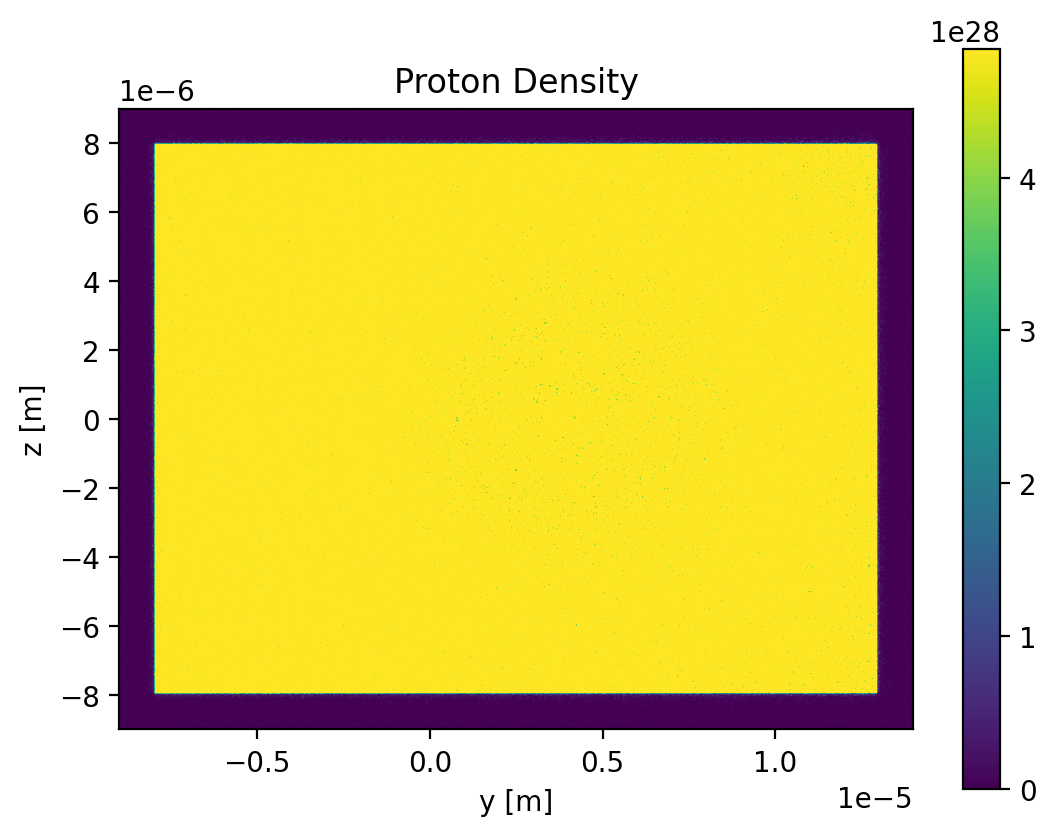

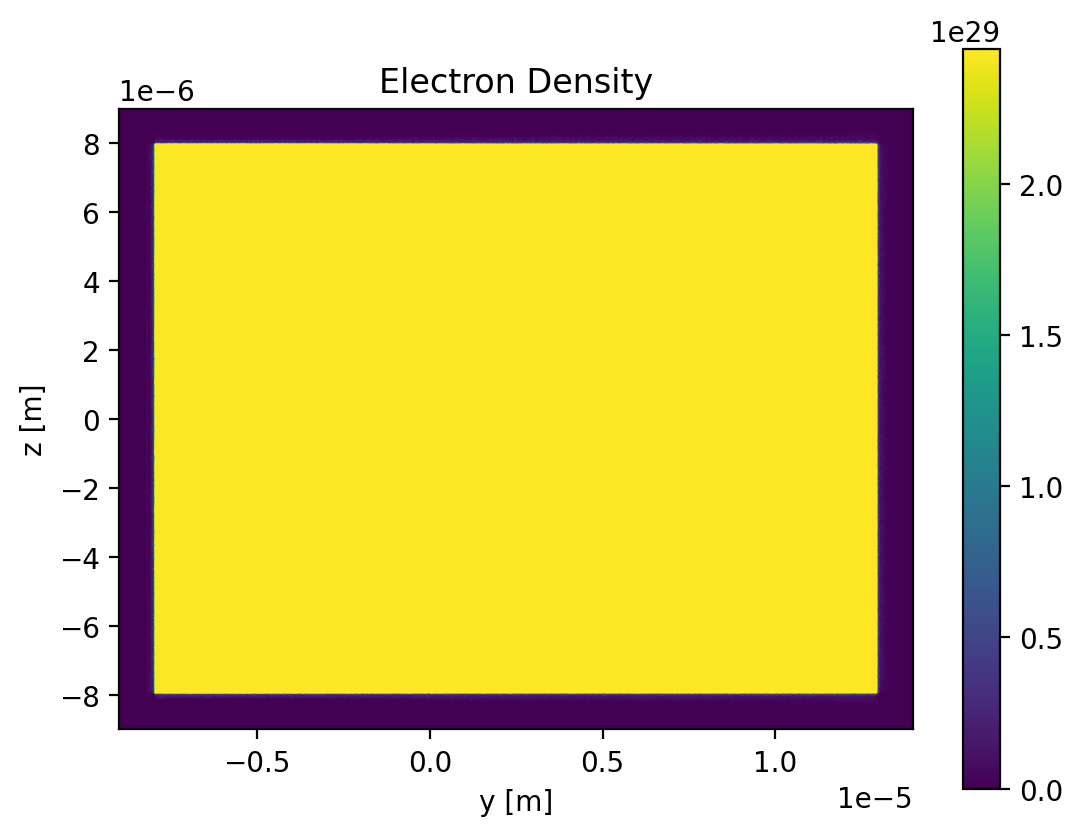

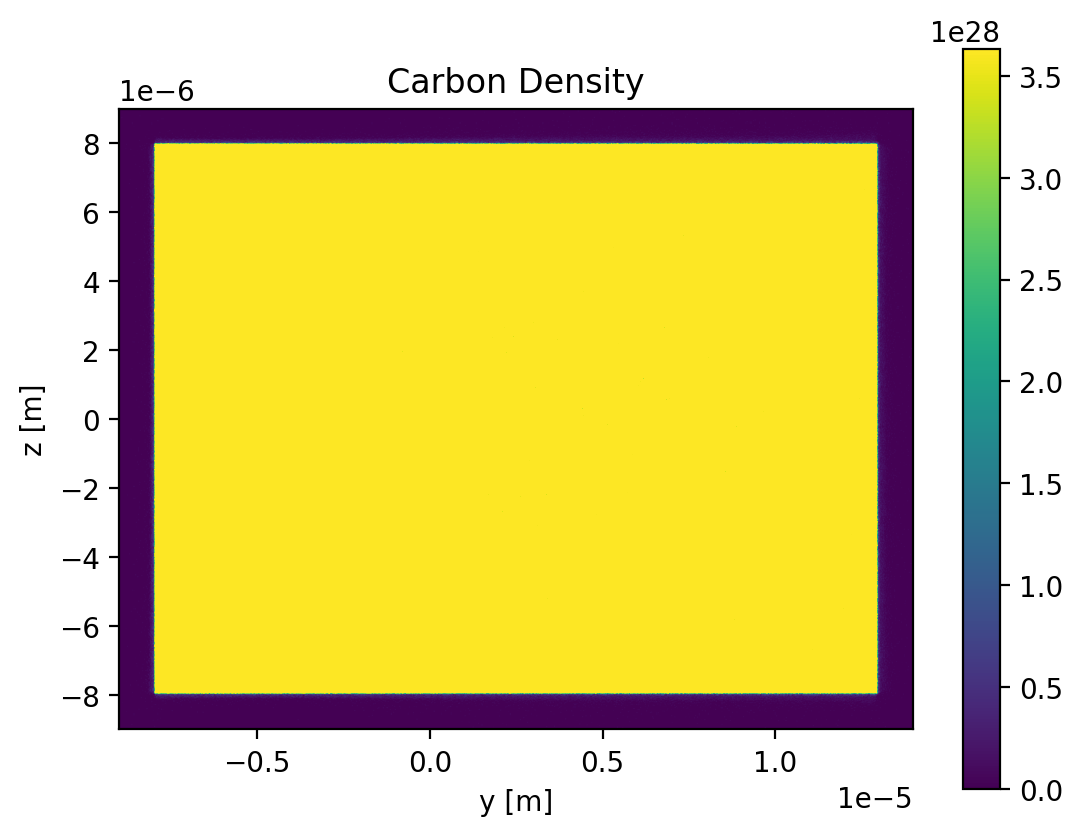

In [13]:
species_list = ["Proton", "Electron", "Carbon"]
densities = []
for species in species_list:
    number_density = np.load(
        os.path.join(raw_data_folder, f"{species}_Derived_Number_Density_YZ.npy"),
        allow_pickle=True,
    )
    densities.append(number_density)
    extent = [y_array[0], y_array[-1], z_array[0], z_array[-1]]
    ani, ax = animate_field(number_density + 1, extent, log_scale=False)
    ax.set_xlabel("y [m]")
    ax.set_ylabel("z [m]")
    ax.set_title(f"{species} Density")
    ani.save(os.path.join(media_folder, f"{species.lower()}_density_log_yz.gif"), fps=10, dpi=300)

## Plot all together

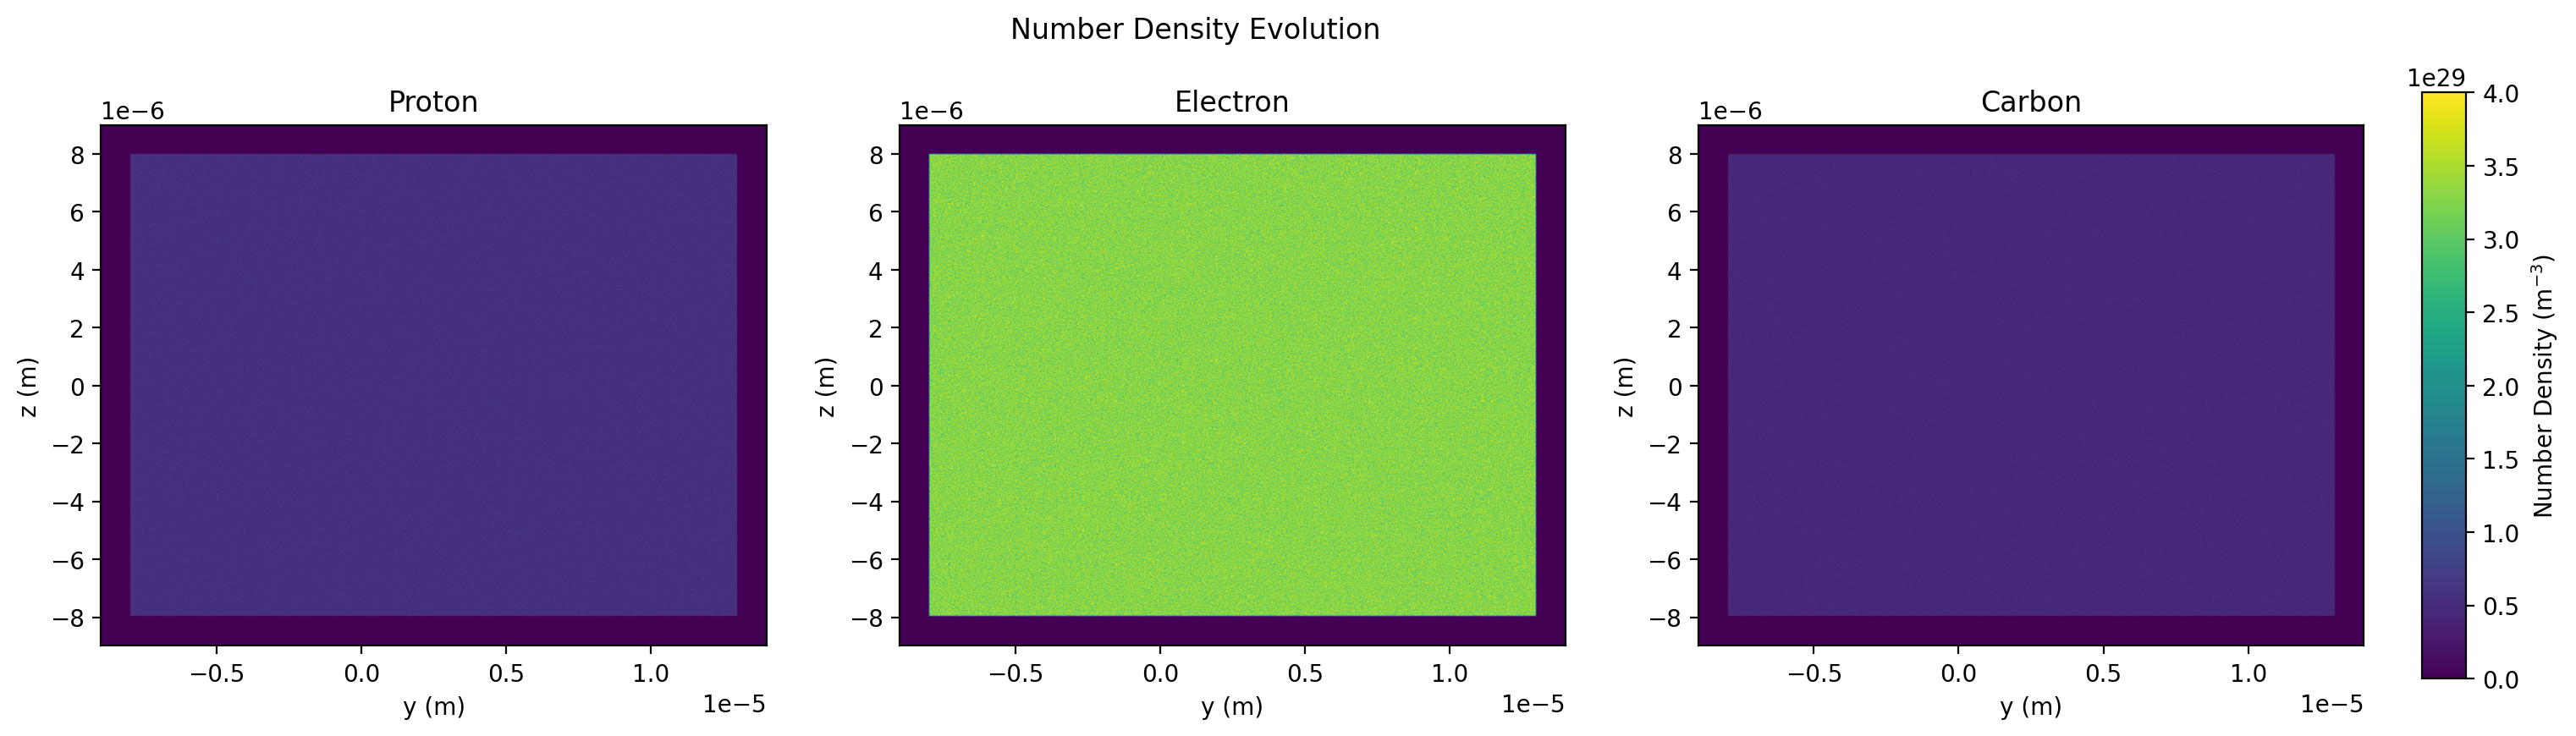

In [14]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

# Create the initial figure with three subplots and colorbars
fig, axs = plt.subplots(1, 3, figsize=(17.25, 4.5))
cbar_ax = fig.add_axes([0.92, 0.11, 0.015, 0.77])

images = []
vmin = 0
vmax = 4e29

for ax, number_density, title in zip(axs, densities, species_list):
    img = ax.imshow(
        number_density[0, :, :].T,
        origin="lower",
        extent=[y_array[0], y_array[-1], z_array[0], z_array[-1]],
        interpolation="nearest",
        vmin=vmin,
        vmax=vmax,
    )
    images.append(img)
    ax.set_title(title)
    ax.set_xlabel("y (m)")
    ax.set_ylabel("z (m)")

fig.colorbar(images[0], cax=cbar_ax, label=r"Number Density (m$^{-3}$)")
fig.suptitle("Number Density Evolution")


# Define an update function for the animation
def update(i):
    for img, density in zip(images, densities):
        img.set_array(density[i, :, :].T)


# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(number_density.shape[0]), blit=False)

plt.show()

In [15]:
# save animation
ani.save(os.path.join(media_folder, "density_yz.gif"), fps=10, dpi=300)